Il file 'Data.csv' contiene i dati relativi al consumo di energia elettrica della macchina del caffè di Alexide.\
La colonna **Date** rappresenta data e ora della registrazione del sensore. Si noti che le date sono espresse in UTC.
Per convertirle nella timezone locale utilizzare\
`df['Date'] = pd.to_datetime(df['Date'], utc = True).dt.tz_convert('Europe/Berlin')`\
La colonna **Energy** rappresenta il consumo di energia totale, espresso in W*min (Watt minuto), a partire dall'accensione del sensore.
Si noti che il sensore è stato riavviato diverse volte nel periodo di osservazione e, a seguito di ciascun riavvio, il conteggio è ripartito da 0.\
La colonna **Topic** rappresenta il topic del messaggio mqtt ricevuto dal sensore.

Rappresentare i consumi totali in kWh (kiloWatt ora) con una heatmap che abbia sull'asse x le ore del giorno e sull'asse y il giorno della settimana.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
from sklearn.linear_model import LinearRegression

In [ ]:
# carichiamo il file .csv
df = pd.read_csv('data.csv', sep=';')
df

,Energy,Date,Topic
0,31678,2022-10-04 07:44:00+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
1,31680,2022-10-04 07:45:02+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
2,31688,2022-10-04 07:46:04+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
3,31692,2022-10-04 07:47:21+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
4,31694,2022-10-04 07:48:15+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
...,...,...,...
54789,129200,2022-07-31 22:29:21+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54790,129200,2022-07-31 22:24:20+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54791,129200,2022-07-31 22:19:21+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54792,129200,2022-07-31 22:14:21+00:00,shellies/shellyplug-s-D9B9EB/relay/0/energy


: 

: 

In [ ]:
# Convertiamola la colonna Date nella timezone locale 
df['Date'] = pd.to_datetime(df['Date'], utc = True).dt.tz_convert('Europe/Berlin')
df['Date']

0       2022-10-04 09:44:00+02:00
1       2022-10-04 09:45:02+02:00
2       2022-10-04 09:46:04+02:00
3       2022-10-04 09:47:21+02:00
4       2022-10-04 09:48:15+02:00
                   ...           
54789   2022-08-01 00:29:21+02:00
54790   2022-08-01 00:24:20+02:00
54791   2022-08-01 00:19:21+02:00
54792   2022-08-01 00:14:21+02:00
54793   2022-08-01 00:09:07+02:00
Name: Date, Length: 54794, dtype: datetime64[ns, Europe/Berlin]

: 

: 

In [ ]:
# ordino il data frame in base alla colonna Date  
df = df.sort_values(by=['Date'])
df

,Energy,Date,Topic
54793,129200,2022-08-01 00:09:07+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54792,129200,2022-08-01 00:14:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54791,129200,2022-08-01 00:19:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54790,129200,2022-08-01 00:24:20+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
54789,129200,2022-08-01 00:29:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
...,...,...,...
50728,70544,2022-10-06 18:39:00+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
50729,70546,2022-10-06 18:40:01+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
50730,70548,2022-10-06 18:41:24+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
50731,70559,2022-10-06 18:42:01+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy


: 

: 

In [ ]:
# vedendo le informazioni della colonna Date possiamo vedere che la conversione per datetime64 è andata a buon fine
df['Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 54794 entries, 54793 to 50732
Series name: Date
Non-Null Count  Dtype                        
--------------  -----                        
54794 non-null  datetime64[ns, Europe/Berlin]
dtypes: datetime64[ns, Europe/Berlin](1)
memory usage: 856.2 KB


: 

: 

Text(0, 0.5, 'Energy')

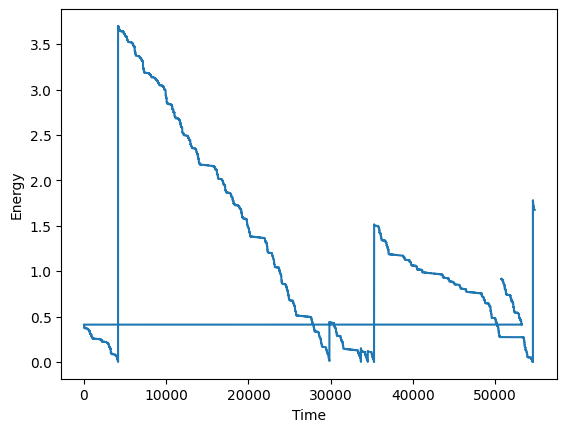

In [131]:
# Faccio la conversione della colonna Energy da Watt minuto (W*m) a kilo Watt all'ora (Kw/h)
df['Energy'] = (df['Energy']/1000) * 60
# plot = df['Energy'].plot()
# plot.set_xlabel('Time')
# plot.set_ylabel('Energy')

In [132]:
# creo la colonna consumo che equivale alla differenza dei valori dell'energia
df['Consumo'] = df['Energy'].diff()

In [133]:
# filtro solo per i valori maggiori di zero (positivi)
df = df[df['Consumo'] > 0]

In [136]:
# Ai valori della 'Consumo' ho bisogno di eseguire la somma per ogni orario, quindi prima devo unire i dati per ogni orario
# Cosa fa la funzione resample: da sample (campione) esegue un 'ricampionamento' è un metodo di convenienza per la conversione di frequenza e il ricampionamento di serie temporali. L'oggetto deve avere un indice di tipo datetime o come in questo caso datetime64
df = df.resample('1H', on='Date').agg({'Consumo': 'sum'}).reset_index()
# reset.index(): Reimposta l'indice del DataFrame e utilizza invece quello predefinito. Se il DataFrame ha un MultiIndex, questo metodo può rimuovere uno o più livelli

In [139]:
# Uso la libreria dateTime per ricavare i giorni della settimana e le ore 
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Hour'] = df['Date'].dt.hour
df

,Date,Consumo,DayOfWeek,Hour
0,2022-08-01 09:00:00+02:00,0.034849,0,9
1,2022-08-01 10:00:00+02:00,0.009228,0,10
2,2022-08-01 11:00:00+02:00,0.059836,0,11
3,2022-08-01 12:00:00+02:00,0.014606,0,12
4,2022-08-01 13:00:00+02:00,0.011068,0,13
...,...,...,...,...
1589,2022-10-06 14:00:00+02:00,0.019284,3,14
1590,2022-10-06 15:00:00+02:00,0.016381,3,15
1591,2022-10-06 16:00:00+02:00,0.010977,3,16
1592,2022-10-06 17:00:00+02:00,0.003862,3,17


In [142]:
# Consumo per ora
Consumo_ora = df[['Consumo', 'Hour']]
Consumo_ora

,Consumo,Hour
0,0.034849,9
1,0.009228,10
2,0.059836,11
3,0.014606,12
4,0.011068,13
...,...,...
1589,0.019284,14
1590,0.016381,15
1591,0.010977,16
1592,0.003862,17


In [144]:
# Sommo la colonna dei giorni della settimana e delle ore
df = df.groupby(['DayOfWeek', 'Hour']).sum()
df

Consumo
DayOfWeek Hour          
0         0     0.002424
          1     0.002385
          2     0.002346
          3     0.002385
          4     0.002359
...                  ...
6         19    0.002307
          20    0.002359
          21    0.002359
          22    0.002398
          23    0.002424

[168 rows x 1 columns]